In [2]:
import pickle
import random
import os
import fnmatch
import sys
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import groupby
import json
import re

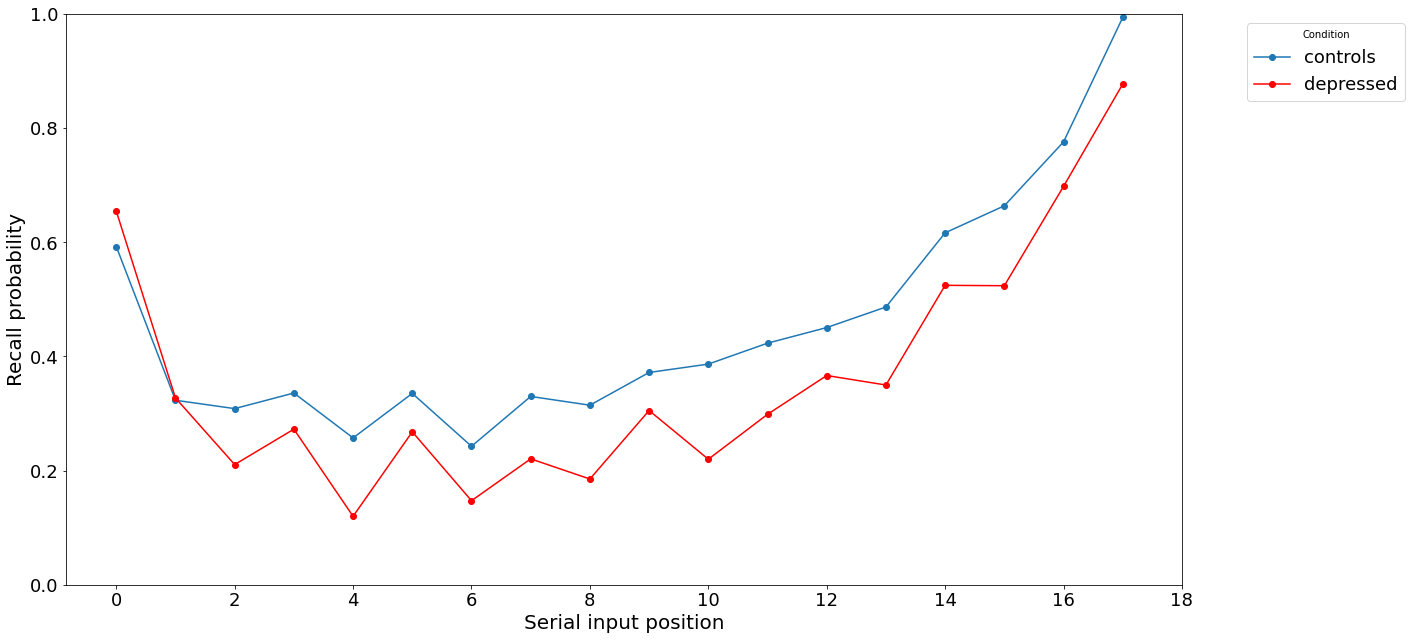

In [24]:
num_agents = 500 #set number of agents per condition
num_lists = 3 #number of lists per agent
# distractor_time = 0
# rumination_chunks = 0
experimental_setup = [[6,20]] #   ,,, [2,10],[2,15],[2,20],[1,20],[1,30],[1,40]  [6,20]

path = f'murdock/agents_{num_agents}_controls_vV/' 
path_b = f'murdock/agents_{num_agents}_depressed_vV/' 


f, ax = plt.subplots(1) #set up plot
f.set_size_inches(20, 10.5)

for parameter in experimental_setup:
    rh = parameter[0] #rehearsal time
    ll = parameter[1] #words per list

    files = [] #Storing all the relevant files to work on them later
    pattern = f"words_{ll}_lists_{num_lists}_rh_time_{rh}*.txt" # Pattern for matching the filename for data retrieval
    for file in os.listdir(path): #Lists all the files and directories within the folder
        #print(file)
        if fnmatch.fnmatch(file, pattern): #matches the above declared patter with the filenames from listdir()
            files.append(file) #Appends the file to make it available for later use.
            
  
    files_b = [] #Storing all the relevant files to work on them later
   # pattern = f"words_{ll}_lists_{num_lists}_rh_time_{rh}*.txt" # Pattern for matching the filename for data retrieval
    for file in os.listdir(path): #Lists all the files and directories within the folder
        #print(file)
        if fnmatch.fnmatch(file, pattern): #matches the above declared patter with the filenames from listdir()
            files_b.append(file) #Appends the file to make it available for later use.
    
    # Initializing all the parameters needed for the plots
    idx = [0,1,2]
    xlabel = 'Serial Input Position'
    ylabel = ['Rehearse Frequency','Starting Probability','Recall Probability']
    #xticks_len = max_list_length+10
    rehearse_frequency = []
    recall_probability = []
    recall_probability_b = []
    first_recall = []
    
    for file in files: #load the result files
        with open(f"{path}/{file}") as f:
            recall_stats = json.load(f)
            if recall_stats['recall_probability']['data']:
                #print(True)
                recall_probability.append(recall_stats['recall_probability']['data'])
            else: #if an agent failed to recall anything...
                recall_probability.append([0]*ll)
                
    for file in files_b: #load the result files
        with open(f"{path_b}/{file}") as f:
            recall_stats_b = json.load(f)
            if recall_stats_b['recall_probability']['data']:
                #print(True)
                recall_probability_b.append(recall_stats_b['recall_probability']['data'])
            else: #if an agent failed to recall anything...
                recall_probability_b.append([0]*ll)    
                
                
                
    #calculating avg stats per input position across agents            
    avg_recall_probs = [sum(x)/num_agents for x in zip(*recall_probability)]
    avg_recall_probs_b = [sum(x)/num_agents for x in zip(*recall_probability_b)]
#     avg_pli = [sum(x)/num_agents for x in zip(*pli_list)]
    
    
    
# #     avg_neg_train = [sum(x)/num_agents for x in zip(*neg_thought_train)]
# #     avg_transitions = [sum(x)/num_agents for x in zip(*transitions)]
    
#     print(f'{ll}-{rh}\nP(First_Item): {round(avg_recall_probs[0],2)}\nP(Final_Item): {round(avg_recall_probs[-1],2)}\nAvg PLI: {sum(avg_pli)/(num_lists-1)}')
#     #print(f'\nAverage negative thought train length: {round(sum(avg_neg_train)/(num_lists),2)}\nAvg num transitions: {round(sum(avg_transitions)/(num_lists),2)}')
    
    #plot results
    x = range(18)
    ax.plot(x, avg_recall_probs[2:20], marker = "o", label = "controls") #, color = 'red' 
    ax.plot(x, avg_recall_probs_b[2:20], marker = "o", label = "depressed", color = 'red')
    #ax.set_xlim([0,ll])
    plt.xticks(np.arange(0, 20, step=2), fontsize = 18)
    plt.yticks(fontsize = 18)# Set label locations
    ax.set_ylim([0,1])
    ax.set_ylabel('Recall probability', fontsize = 20)
    ax.set_xlabel('Serial input position', fontsize = 20)
    
ax.legend()
ax.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 18) #fontsize='xx-small')
